## Multiple Linear Regression

**Hipothesis**

Similar to Linear Regression, the hypothesys approximate $y$ as a linear function of $x$ with multiple variables.

$$h_{\theta}(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + ... +  \theta_nx_n$$

$$h_{\theta}(x) = \theta_0 + \sum_{i=1}^{n}\theta_iX_i$$


If we consider the definition of the hypothesis, during the implementation, always $x_0 = 1$:

| $\theta_0x_0$ | $\theta_1x_1$ | $\theta_2x_2$ | $\theta_3x_3$ | $\theta_nx_n$ |
|:-------------:|:-------------:|:-------------:|:-------------:|:-------------:|
|       1       |      ...      |      ...      |      ...      |      ...      |
|       1       |      ...      |      ...      |      ...      |      ...      |
|       1       |      ...      |      ...      |      ...      |      ...      |
|       1       |      ...      |      ...      |      ...      |      ...      |
|       1       |      ...      |      ...      |      ...      |      ...      |

So, based on this, we can say:

$$h_{\theta}(x) = \sum_{i=0}^{n}\theta_iX_i$$


The vector $\theta$ will have the shape equals to $(n+1, 1)$

$$\theta = \begin{bmatrix}\theta_0 \\ \theta_1 \\ \theta_2 \\ \theta_3 \\ \theta_n\end{bmatrix}$$

and the vector $x$ will be represented as:

$$x = \begin{bmatrix}1 \\ x_1 \\ x_2 \\ x_3 \\ x_n\end{bmatrix}$$

If we transpose $\theta$ will have:

$$h_{\theta}(x) = \theta^\intercal x$$

Which is represented as:

$$\begin{bmatrix}\theta_0 & \theta_1 & \theta_2 & \theta_3 & \theta_n\end{bmatrix} \begin{bmatrix}1 \\ x_1 \\ x_2 \\ x_3 \\ x_n\end{bmatrix} = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + \theta_nx_n$$

**Loss Function: Mean Squared Error**

$$J = \frac{1}{2m} \sum_{i=1}^{m}(ŷ^{(i)} - y^{(i)})²$$

$$J = \frac{1}{2m}\sum_{i=1}^{m}[h_\theta(x^{(i)}) - y^{(i)}]²$$

$$J = \frac{1}{2m}\sum_{i=1}^{m}[\theta^\intercal x - y^{(i)}]²$$


**Gradient Descent: Generalize update for $\theta_j$ Update Rule**

$$\require{cancel}$$  

$$\theta_j = \theta_j - \alpha * \frac{\partial J(\theta)}{\partial \theta_j}$$

Let's consider again $J$ as:

$$J = \frac{1}{2m}\sum_{i=1}^{m}[h_\theta(x^{(i)}) - y^{(i)}]²$$


$$\frac{\partial J(\theta)}{\partial \theta_j} =  \frac{ \cancel{2} }{\cancel{2}m}\sum_{i=1}^{m}[h_\theta(x^{(i)}) - y^{(i)}](\cancel{\theta_0} + \cancel{\theta_1x_1} + \cancel{\theta_2x_2} + \theta_jx_j + \cancel{\theta_nx_n})$$


$$\frac{\partial J(\theta)}{\partial \theta_j} =  \frac{1}{m}\sum_{i=1}^{m}[h_\theta(x^{(i)}) - y^{(i)}]x_j^{(i)}$$

### Implementation

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
plt.style.use("seaborn-v0_8-whitegrid")

**Generate the data**

In [2]:
X, y = make_regression(n_samples=500, n_features=10, n_informative=5, noise=25.8, random_state=0)
print("X shape:", X.shape, "y shape:", y.shape)

X shape: (500, 10) y shape: (500,)


In [3]:
df = pd.DataFrame(X).head()
df

,0,1,2,3,4,5,6,7,8,9
0,1.706468,1.511639,-0.000417,0.374155,0.073285,0.701783,0.409552,-0.461894,-0.626490,-0.799593
1,-1.616956,0.640132,-0.369182,-0.239379,-0.738031,-0.024326,1.099660,0.279925,-0.098150,0.655264
2,0.093953,-0.130107,0.929505,0.582225,-2.739677,0.943046,-2.094603,-0.569312,0.269904,0.123722
3,-1.542758,-0.789954,0.537035,-0.286835,-2.369623,-0.767332,1.634406,-0.260560,0.128957,0.571227
4,-0.101003,-2.231538,0.436187,1.571463,1.324868,-0.587375,1.077315,0.840648,0.261106,0.811090


**Normalize**

In [4]:
def normalize(X):
    u = X.mean(axis=0)
    std = X.std(axis=0)
    return (X-u)/std

In [5]:
X = normalize(X=X)

In [6]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
2,0.125936,-0.058708,1.030243,0.559735,-2.658385,1.007996,-2.100631,-0.566372,0.213499,0.175267
3,-1.537551,-0.717175,0.635024,-0.351591,-2.295090,-0.855000,1.655498,-0.263762,0.068151,0.629417
4,-0.072209,-2.155744,0.533470,1.597083,1.331926,-0.658985,1.094355,0.815541,0.204426,0.872842


In [7]:
X.mean(axis=0)

array([-2.75335310e-17,  5.82867088e-17, -1.06581410e-17, -1.39888101e-17,
        2.49800181e-18,  4.28546088e-17,  1.43635104e-17,  1.46549439e-17,
        7.14983628e-17, -1.07691633e-16])

In [8]:
X.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

**Visualize $y$ as function of each feature**

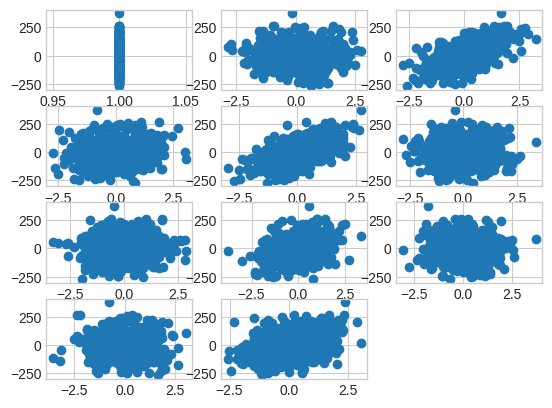

In [33]:
for f in range(X.shape[1]):
    plt.subplot(4, 3, f + 1)
    plt.scatter(X[:,f], y)
    
plt.show()

**Preprocess**

In [18]:
n_features = X.shape[1]

In [19]:
def preprocess(X):
    # Add dummy column of 1s in X as 0th column
    if X.shape[1] == n_features: 
        m = X.shape[0]
        ones = np.ones((m, 1))
        X = np.hstack((ones, X))
    return X

In [20]:
X = preprocess(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,1.0,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
2,1.0,0.125936,-0.058708,1.030243,0.559735,-2.658385,1.007996,-2.100631,-0.566372,0.213499,0.175267
3,1.0,-1.537551,-0.717175,0.635024,-0.351591,-2.295090,-0.855000,1.655498,-0.263762,0.068151,0.629417
4,1.0,-0.072209,-2.155744,0.533470,1.597083,1.331926,-0.658985,1.094355,0.815541,0.204426,0.872842


**Train test split**

In [21]:
XT, Xt, yT, yt = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=0)

In [22]:
print("XT Shape:", XT.shape, "Xt Shape:", Xt.shape, "yT Shape:", yT.shape,"yt Shape:", yt.shape)

XT Shape: (350, 11) Xt Shape: (150, 11) yT Shape: (350,) yt Shape: (150,)


**Modelling**

Matrices shape:

$X_(mx(n+1))$

$\theta_((n+1), 1)$

$(X \cdot \theta)_{(m,1)}$


Dot product:

$$X \cdot \theta = h_{\theta}(x^{(i)}) = \begin{bmatrix}1 & x_1^{(i)} & x_2^{(i)} & x_3^{(i)} & ... & X_n^{(i)}\end{bmatrix} \begin{bmatrix} \\ \theta_0 \\ \theta_1 \\ \theta_2 \\ \theta_3 \\ ... \\ \theta_n\end{bmatrix} = \theta_0 + \theta_1x_1^{(i)} + \theta_2x_2^{(i)} + \theta_3x_3^{(i)} + \theta_nx_n^{(i)}$$

In [23]:
def hypothesis(X, theta):
    return np.dot(X, theta)

$$J = \frac{1}{2m}\sum_{i=1}^{m}[h_\theta(x^{(i)}) - y^{(i)}]²$$

In [24]:
def loss(X, y, theta):
    yp = hypothesis(X, theta) # shape (m,1)
    error = np.mean((y - yp)**2)
    return error

$$\theta_j = \theta_j - \alpha * \frac{\partial J(\theta)}{\partial \theta_j}$$

$$\frac{\partial J(\theta)}{\partial \theta_j} =  \frac{1}{m}\sum_{i=1}^{m}[h_\theta(x^{(i)}) - y^{(i)}]x_j^{(i)}$$

In [30]:
def gradient(X, y, theta):
    yp = hypothesis(X, theta)
    m = X.shape[0]
    grad = np.dot(X.T, (yp - y))
    return grad / m

**Training**

In [31]:
 def train(X, y, learning_rate=0.1, max_iters=100):
    n = X.shape[1] # N° of features
    theta = np.random.randn(n) # Initialize random theta values
    error_list = []
    
    for i in range(max_iters):
        error = loss(X, y, theta)
        error_list.append(error)
        grad = gradient(X, y, theta)
        theta = theta - learning_rate * grad
    
    plt.title("Error")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.plot(error_list)
    return theta, error_list

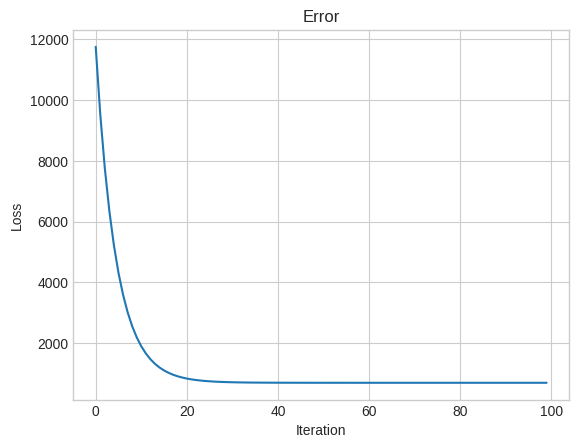

In [32]:
theta, error_list = train(XT, yT)

**Evaluation: R2 Score**

Coefficient of determination is a statistical measure of how well the regression predictions aproximate the real data points.

An $R2$ score has a range between 0 and 1. $R2 = 1$ means the predicted points fit 100% the real target points, which indicates the regression predictions prefectly fit the data, while $R2 = 0$ means 0% of accuracy.


$$R2 Score = 1 - \frac{T1}{T2}$$

$T1$: Distances of the target data points from the predicted data points (Projected Line).

$$\sum_{i=1}^{m}(y^{(i)} - ŷ^{(i)})²$$

$T2$: Distances of the target data points from the mean.

$$\sum_{i=1}^{m}(y^{(i)} - \overline{y})²$$

$$R2 = 1 - \frac{\sum_{i=1}^{m}(y^{(i)} - ŷ^{(i)})²}{\sum_{i=1}^{m}(y^{(i)} - \overline{y})²}$$

In [34]:
def r2Score(y, yp):
    T1 = np.sum((y - yp)**2)
    T2 = np.sum((y - y.mean())**2)
    return 1 - (T1 / T2)

In [35]:
yp = hypothesis(Xt, theta)

In [39]:
r2 = r2Score(yt, yp)
print("R2 Score:", r2, "=", f"{round(r2*100, 2)}%")

R2 Score: 0.9321413718969671 = 93.21%
